In [129]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import geopandas as gpd
import seaborn as sns#Understanding my variables


In [130]:
df = pd.read_csv(r'Dataset\australian_data_analyst_jobs.csv',sep=',')

df['company_name'] = df['company_name'].replace('Talent International Holdings Pty Ltd.','Talent International')
df['company_name'] = df['company_name'].replace('Commonwealth Bank Of Australia','CommBank')
df['company_name'] = df['company_name'].replace('The British United Provident Association Limited','The British United Provident')

In [131]:
df['company_name']

0                     Wesley Mission Queensland
1                            Ford Motor Company
2      Catholic Education Diocese Of Parramatta
3                               Northern Health
4                  The Smith Family (Australia)
                         ...                   
495                  Queensland Urban Utilities
496                        Talent International
497                               Talent Street
498                           Dh And Associates
499      Central Australian Aboriginal Congress
Name: company_name, Length: 500, dtype: object

In [132]:
#Entenda o dado
print(df.shape)

(500, 8)


In [133]:
df.head()


,company_name,job_title,job_description,job_location/city,job_location/country,job_salary/estimated,job_salary/pay_period,job_posted_date
0,Wesley Mission Queensland,Data And Insights Analyst,Reference Number 15304\nPosition Title Data an...,Australia,australia,False,hourly,2024-01-28T00:00:00
1,Ford Motor Company,Marketing Communications Analyst,"About Us\n\nFord is a family company, one that...",Richmond,australia,True,hourly,2024-02-14T00:00:00
2,Catholic Education Diocese Of Parramatta,Data Analyst,THANK YOU FOR YOUR INTEREST IN APPLYING FOR A ...,Parramatta,australia,True,hourly,2024-01-23T00:00:00
3,Northern Health,Data Analyst,About Northern Health:\n\n\n\n\nAs an organisa...,Australia,australia,False,hourly,2024-02-06T00:00:00
4,The Smith Family (Australia),Policy Analyst,* Become part of our family and make a differe...,Australia,australia,False,hourly,2024-02-15T00:00:00


In [134]:
print(df.columns)

Index(['company_name', 'job_title', 'job_description', 'job_location/city',
       'job_location/country', 'job_salary/estimated', 'job_salary/pay_period',
       'job_posted_date'],
      dtype='object')


In [135]:
df.describe()

,company_name,job_title,job_description,job_location/city,job_location/country,job_salary/estimated,job_salary/pay_period,job_posted_date
count,474,500,500,500,500,500,500,500
unique,286,279,431,70,1,2,1,31
top,CommBank,Data Analyst,"We are inviting selected students (BA, MS) in ...",Sydney,australia,True,hourly,2024-02-15T00:00:00
freq,20,79,4,164,500,256,500,40


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company_name           474 non-null    object
 1   job_title              500 non-null    object
 2   job_description        500 non-null    object
 3   job_location/city      500 non-null    object
 4   job_location/country   500 non-null    object
 5   job_salary/estimated   500 non-null    bool  
 6   job_salary/pay_period  500 non-null    object
 7   job_posted_date        500 non-null    object
dtypes: bool(1), object(7)
memory usage: 28.0+ KB


C:\Users\tamir\AppData\Local\Temp\ipykernel_27792\3056392232.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vagas_por_cidade.index, y=vagas_por_cidade.values, palette='viridis')


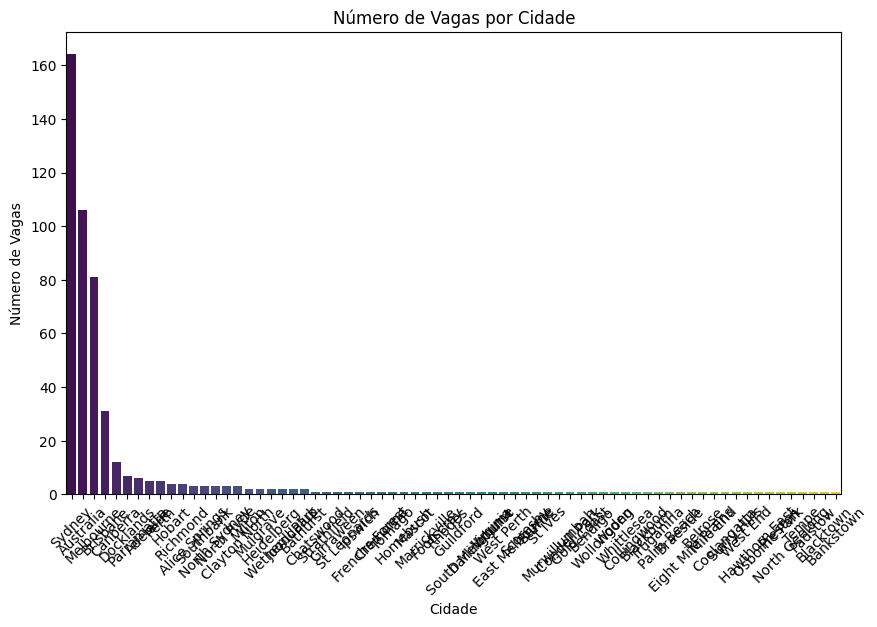

In [137]:
# Contar o número de vagas por cidade
vagas_por_cidade = df['job_location/city'].value_counts()

# Visualizar as cidades que mais contratam
plt.figure(figsize=(10,6))
sns.barplot(x=vagas_por_cidade.index, y=vagas_por_cidade.values, palette='viridis')
plt.title('Número de Vagas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Número de Vagas')
plt.xticks(rotation=45)
plt.show()


C:\Users\tamir\AppData\Local\Temp\ipykernel_27792\4093760305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades.index, y=top_cidades.values, palette='viridis')


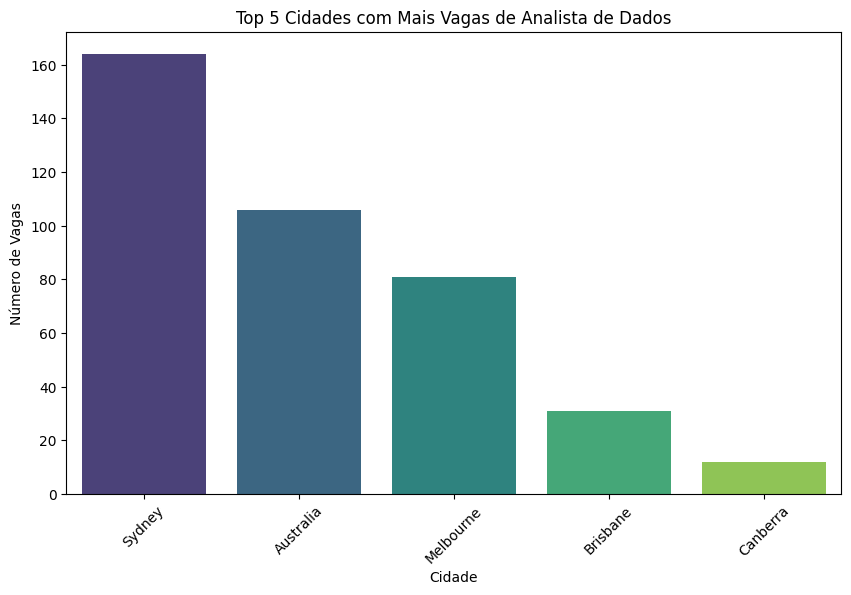

In [138]:
# Pegar as cinco cidades com mais vagas
top_cidades = vagas_por_cidade.head(5)

# Visualizar as cinco cidades com mais vagas
plt.figure(figsize=(10,6))
sns.barplot(x=top_cidades.index, y=top_cidades.values, palette='viridis')
plt.title('Top 5 Cidades com Mais Vagas de Analista de Dados')
plt.xlabel('Cidade')
plt.ylabel('Número de Vagas')
plt.xticks(rotation=45)
plt.show()


C:\Users\tamir\AppData\Local\Temp\ipykernel_27792\2171648938.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vagas_por_segmento.index, y=vagas_por_segmento.values, palette='viridis')


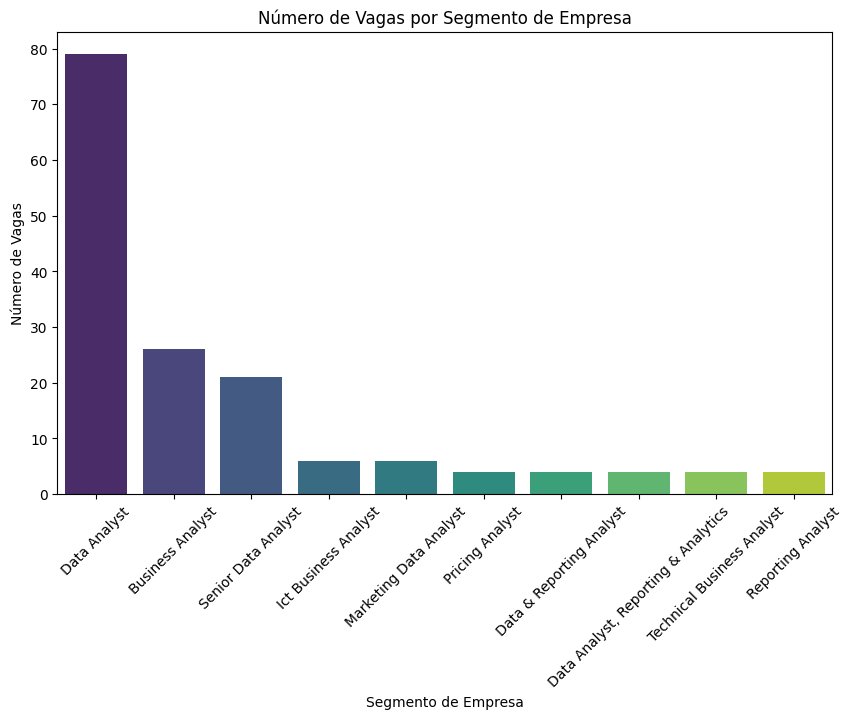

In [139]:
# Contar o número de vagas por segmento de empresa
vagas_por_segmento = df['job_title'].value_counts().head(10)

# Visualizar os segmentos de empresas que mais demandam profissionais de dados
plt.figure(figsize=(10,6))
sns.barplot(x=vagas_por_segmento.index, y=vagas_por_segmento.values, palette='viridis')
plt.title('Número de Vagas por Segmento de Empresa')
plt.xlabel('Segmento de Empresa')
plt.ylabel('Número de Vagas')
plt.xticks(rotation=45)
plt.show()


C:\Users\tamir\AppData\Local\Temp\ipykernel_27792\722952159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vagas_por_empresa.index, y=vagas_por_empresa.values, palette='viridis')


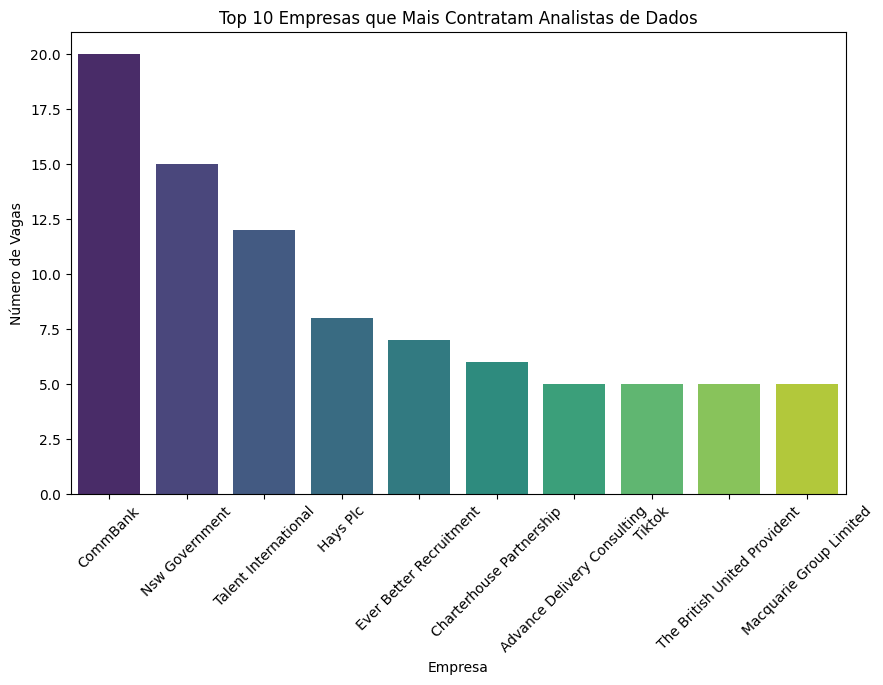

In [140]:

# Contar o número de vagas por empresa
vagas_por_empresa = df['company_name'].value_counts().head(10)

# Visualizar as empresas que mais contratam analistas de dados
plt.figure(figsize=(10,6))
sns.barplot(x=vagas_por_empresa.index, y=vagas_por_empresa.values, palette='viridis')
plt.title('Top 10 Empresas que Mais Contratam Analistas de Dados')
plt.xlabel('Empresa')
plt.ylabel('Número de Vagas')
plt.xticks(rotation=45)
plt.rcParams['legend.fontsize'] = 12
plt.show()


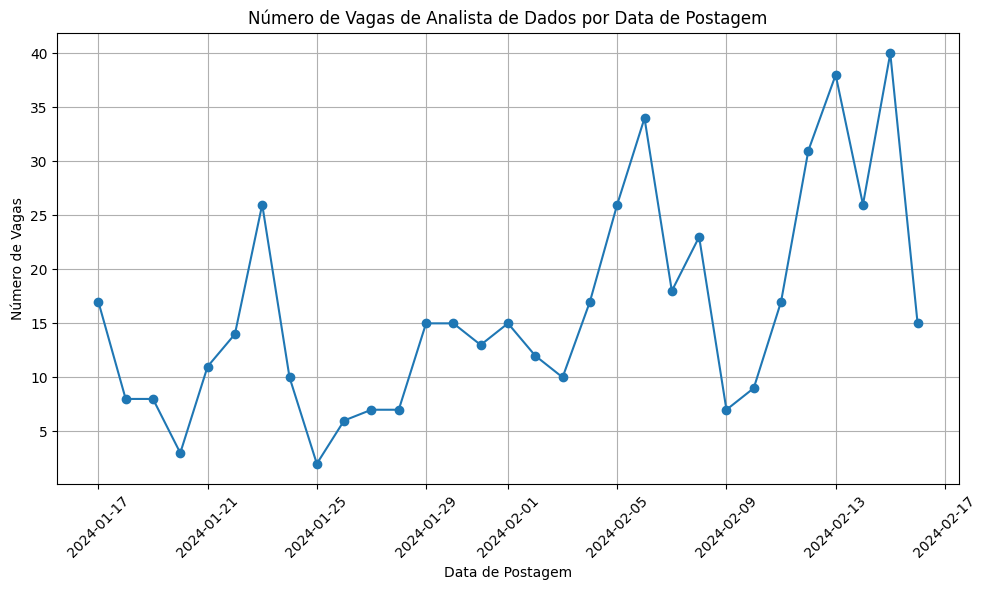

In [149]:
# Convertendo a coluna de data para o tipo datetime, se necessário
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Contar o número de vagas por data de postagem
vagas_por_data = df['job_posted_date'].value_counts().sort_index()

# Visualizar o número de vagas ao longo do tempo
plt.figure(figsize=(10,6))
plt.plot(vagas_por_data.index, vagas_por_data.values, marker='o', linestyle='-')
plt.title('Número de Vagas de Analista de Dados por Data de Postagem')
plt.xlabel('Data de Postagem')
plt.ylabel('Número de Vagas')
plt.xticks(rotation=45)
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()
